Dataset Preview:
   Unnamed: 0  ID  INCOME($)  AGE
0           0   1      50000   20
1           1   2      60000   45
2           2   3      45000   32
3           3   4      30000   38
4           4   5      70000   22


F:\anca\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anca\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anca\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anca\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

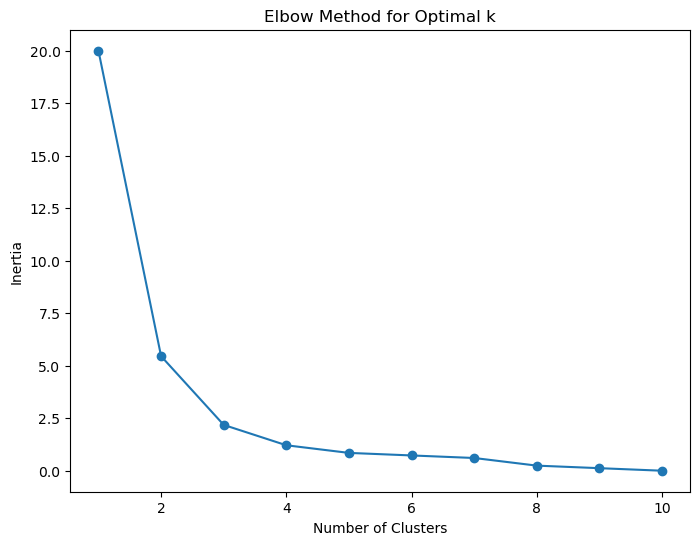

F:\anca\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Centroids (in scaled space):
Cluster 0: [-0.17407766 -0.17407766]
Cluster 1: [1.04446594 1.04446594]
Cluster 2: [-1.21854359 -1.21854359]


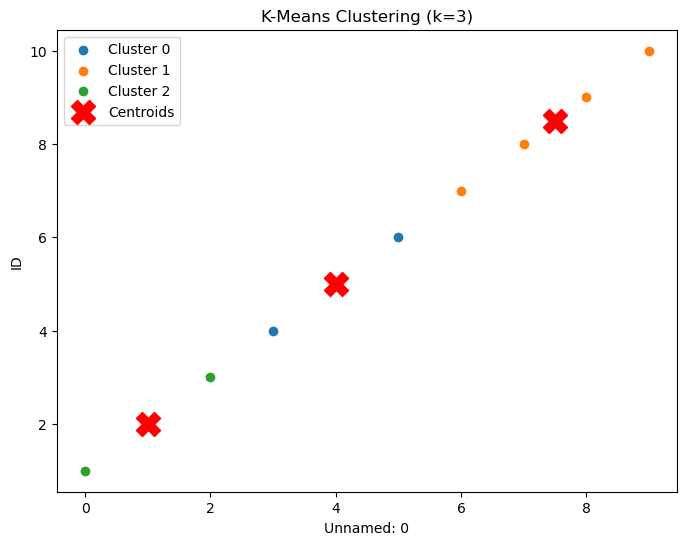

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'income.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Assuming the dataset has two features for clustering (e.g., Income and Age)
columns_to_use = data.columns[:2]  # Adjust this if needed based on the dataset
X = data[columns_to_use].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose an optimal number of clusters (e.g., 3)
optimal_k = 3  # Adjust this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster labels to the original dataset
data['Cluster'] = labels

# Display the new centroids
print("\nCentroids (in scaled space):")
for idx, centroid in enumerate(centroids):
    print(f"Cluster {idx}: {centroid}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')

# Plot centroids (in original space, since we want to visualize in original units)
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel(columns_to_use[0])
plt.ylabel(columns_to_use[1])
plt.legend()
plt.show()
